In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape


(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
df['quality'].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

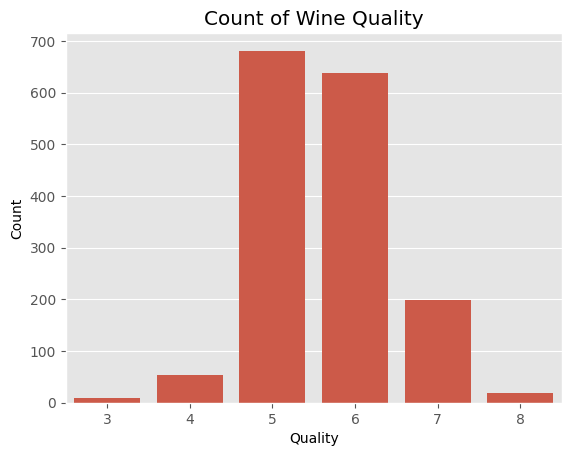

In [10]:
style.use('ggplot')
sns.countplot(x='quality', data=df)
plt.title('Count of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

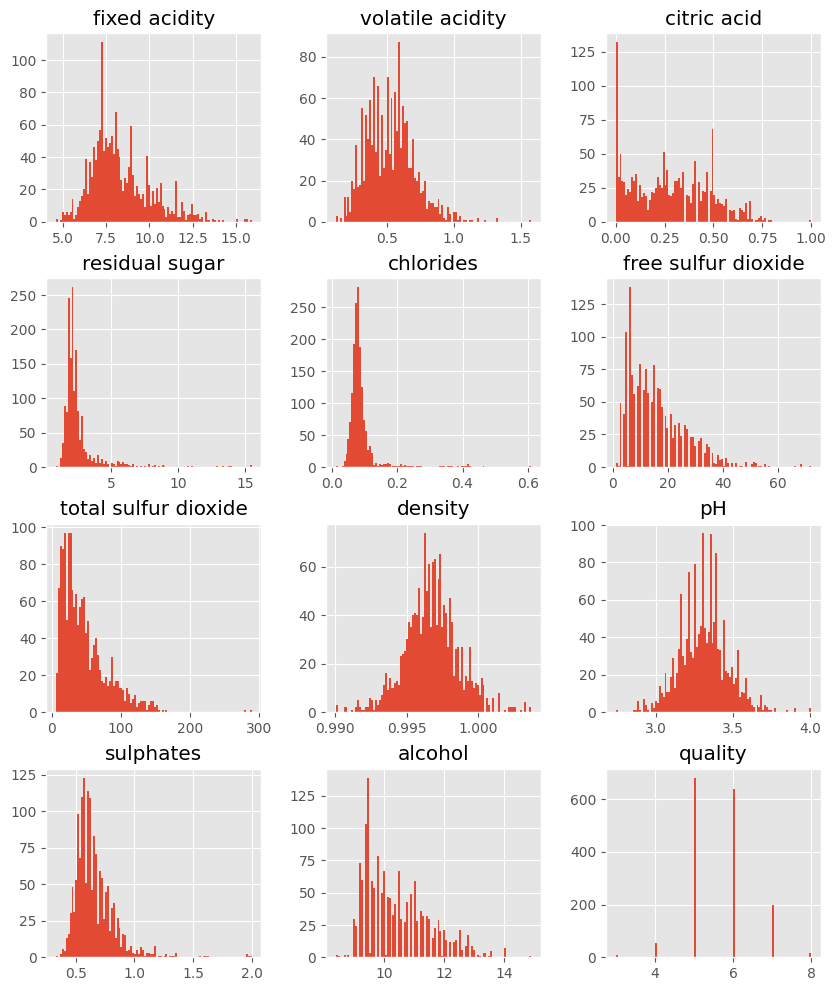

In [11]:
df.hist(bins=100, figsize=(10,12))
plt.show()

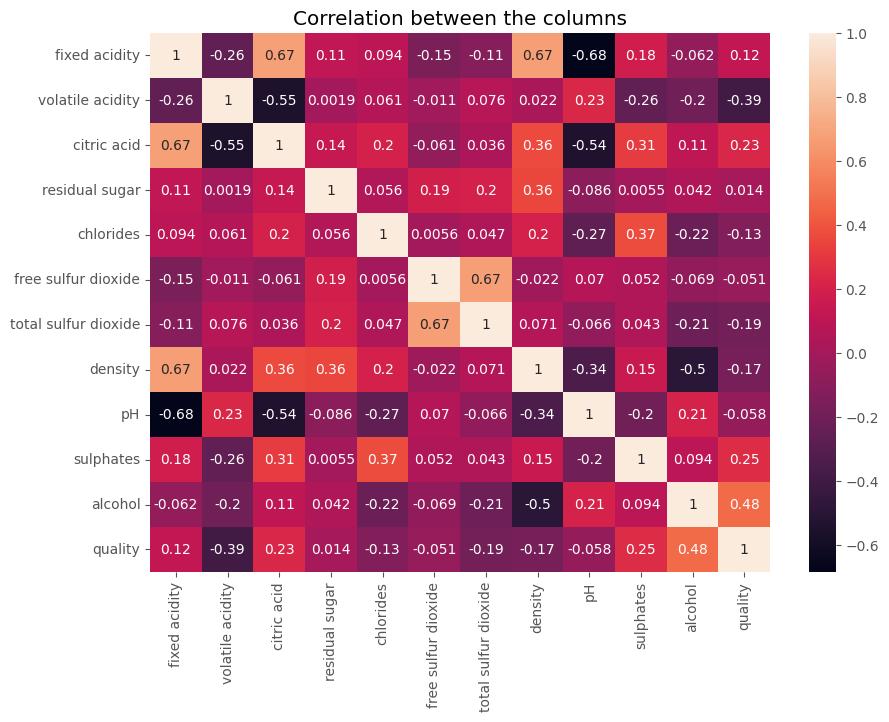

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [13]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

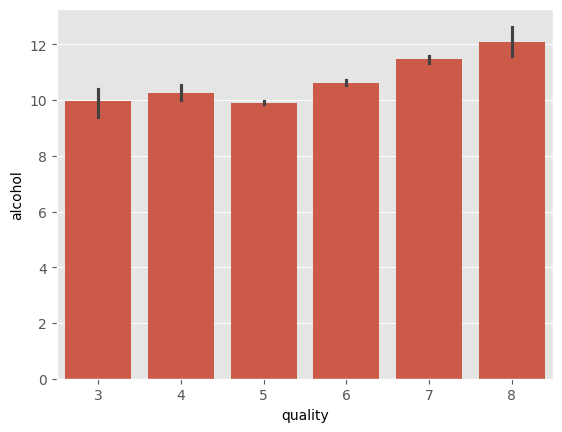

In [14]:
sns.barplot(x='quality', y='alcohol', data=df)


In [15]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [16]:
X = df.drop('quality', axis=1)
y = df['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


In [18]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


# Model Training

# K-Nearest Neighbor


Accuracy: 62.92%
Sensitivity: 0.66
Specificity: 0.59
Balanced Accuracy: 62.81%
Matthews Correlation Coefficient (MCC): 0.26
Precision: 0.64
Recall: 0.66
F-Measure: 0.65


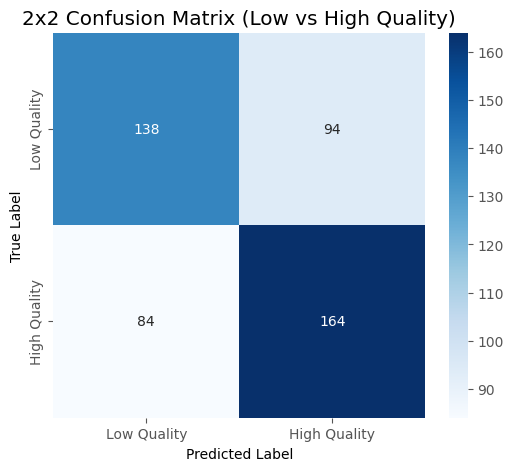

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report # Import classification_report


# Load your DataFrame 'df' here
# Replace 'your_data_file.csv' with the actual path to your CSV file
df = pd.read_csv('winequality-red.csv') # Load the DataFrame

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)
threshold = 6
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low, 1 = high quality

# ... (rest of your code) ...

# Split the data into training and testing sets (70% training, 30% testing) with randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors as needed
knn.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = knn.predict(X_test)

# Calculate confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate metrics using formulas
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = (tp + tn) / (tp + tn + fp + fn) * 100

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn)

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp)

# Balanced Accuracy: (Sensitivity + Specificity) / 2
balanced_acc = (sensitivity + specificity) * 100 / 2

# Matthews Correlation Coefficient (MCC): (TP * TN - FP * FN) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)

# Precision: TP / (TP + FP)
precision = tp / (tp + fp)

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
# Note: Recall is the same as Sensitivity in this context
f_measure = 2 * (precision * sensitivity) / (precision + sensitivity)

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {sensitivity:.2f}")  # Recall is the same as Sensitivity
print(f"F-Measure: {f_measure:.2f}")

# Plot 2x2 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


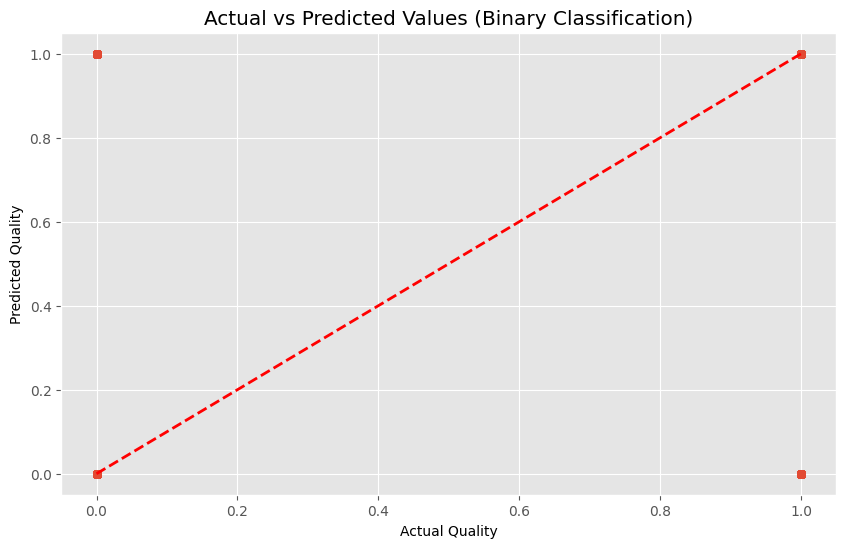

In [20]:
plt.figure(figsize=(10, 6))
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.scatterplot(data=actual_vs_predicted, x="Actual", y="Predicted", alpha=0.6, edgecolor=None)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)  # Diagonal line for perfect prediction
plt.title("Actual vs Predicted Values (Binary Classification)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()

# Decision Tree



Accuracy: 76.67%
Balanced Accuracy: 76.13%
Matthews Correlation Coefficient (MCC): 0.5255694124330593

Classification Report:
               precision    recall  f1-score   support

 Low Quality       0.75      0.71      0.73       213
High Quality       0.78      0.81      0.79       267

    accuracy                           0.77       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.77      0.77      0.77       480



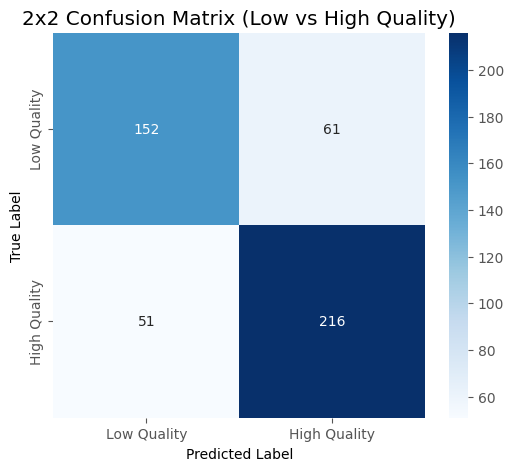

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, balanced_accuracy_score,
    matthews_corrcoef, confusion_matrix
)

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Define the threshold for binary classification
threshold = 6

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low quality, 1 = high quality

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate metrics
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage

# Balanced Accuracy: (TPR + TNR) / 2
balanced_acc = balanced_accuracy_score(y_test, y_pred) * 100  # Convert balanced accuracy to percentage

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print("Matthews Correlation Coefficient (MCC):", mcc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


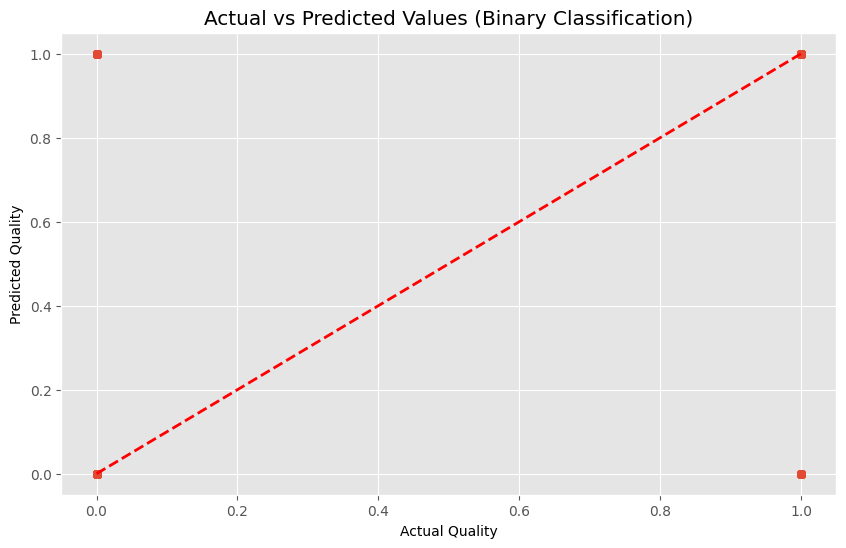

In [22]:
plt.figure(figsize=(10, 6))
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.scatterplot(data=actual_vs_predicted, x="Actual", y="Predicted", alpha=0.6, edgecolor=None)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Values (Binary Classification)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()


# SVM

Accuracy: 75.21%
Sensitivity (Recall): 0.74
Specificity: 0.77
Balanced Accuracy: 150.79%
Matthews Correlation Coefficient (MCC): 0.50
Precision: 0.80
Recall: 0.74
F-Measure: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       214
           1       0.80      0.74      0.77       266

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.76      0.75      0.75       480



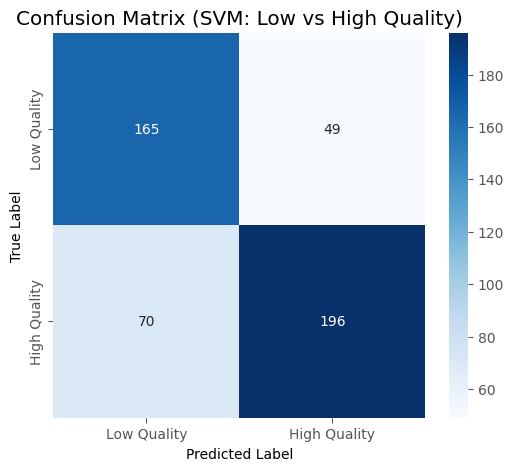

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)
threshold = 6
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low, 1 = high quality

# Split the data into training and testing sets (70% training, 30% testing) with randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=0)  # You can change the kernel if needed
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate confusion matrix values
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()  # Extract TN, FP, FN, TP

# Calculate metrics using formulas
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = (tp + tn) / (tp + tn + fp + fn) * 100

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn)

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp)

# Balanced Accuracy: (TPR + TNR) / 2
balanced_acc = ((tp / (tp + fn)) + (tn / (tn + fp))) * 100  # TPR = sensitivity, TNR = specificity

# Matthews Correlation Coefficient (MCC): (TP * TN - FP * FN) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)

# Precision: TP / (TP + FP)
precision = tp / (tp + fp)

# Recall: TP / (TP + FN)
recall = sensitivity  # Same as sensitivity

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
f_measure = 2 * (precision * recall) / (precision + recall)

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-Measure: {f_measure:.2f}")

# Print classification report (still uses sklearn function for convenience)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("Confusion Matrix (SVM: Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


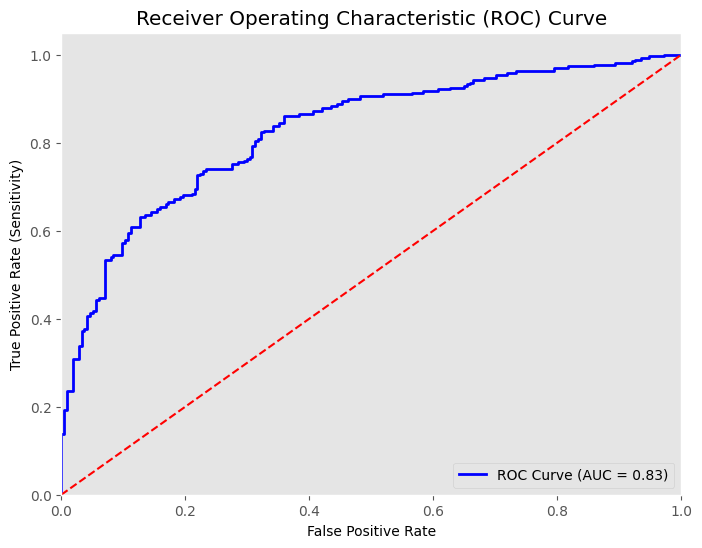

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and X_test are already defined, and svm_classifier is trained
y_prob = svm_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


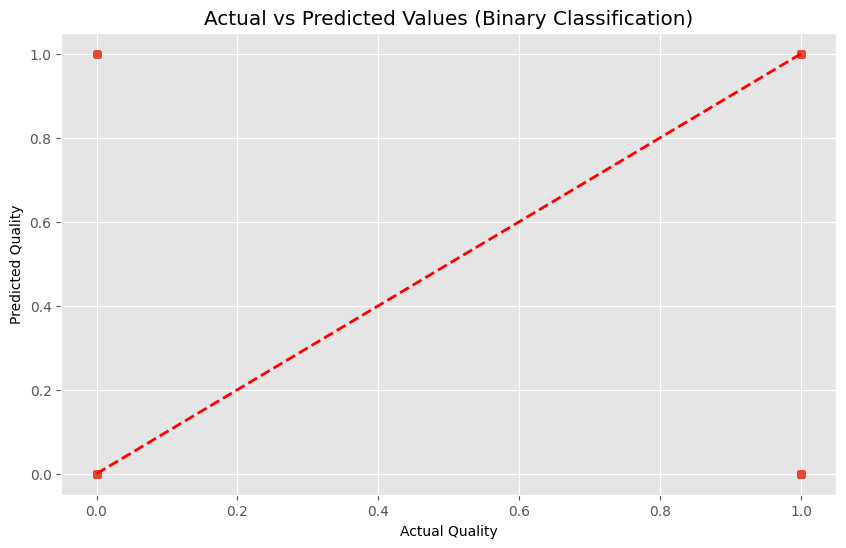

In [25]:
plt.figure(figsize=(10, 6))
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
sns.scatterplot(data=actual_vs_predicted, x="Actual", y="Predicted", alpha=0.6, edgecolor=None)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)  # Diagonal line for perfect prediction
plt.title("Actual vs Predicted Values (Binary Classification)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()

# Random Forest

Accuracy: 80.00%
Balanced Accuracy: 79.61%
Sensitivity (Recall): 0.84
Specificity: 0.76
Precision: 0.81
F-Measure: 0.82
Matthews Correlation Coefficient (MCC): 0.5951895693371363

Classification Report:
               precision    recall  f1-score   support

 Low Quality       0.79      0.76      0.77       217
High Quality       0.81      0.84      0.82       263

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



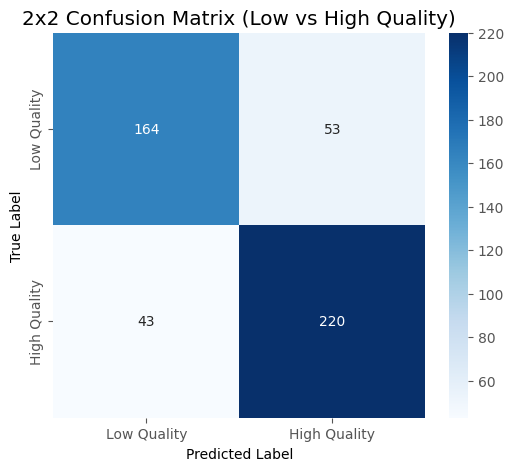

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Define the threshold for binary classification
threshold = 6

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)  # Features
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low quality, 1 = high quality

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # Removed random_state for variability

# Initialize and fit the Random Forest model
rf = RandomForestClassifier()  # Removed random_state for variability
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = (tp + tn) / (tp + tn + fp + fn) * 100  # Convert accuracy to percentage

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Balanced Accuracy: (TPR + TNR) / 2
balanced_acc = (sensitivity + specificity) * 100 / 2  # Convert balanced accuracy to percentage

# Precision: TP / (TP + FP)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
f_measure = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

# Matthews Correlation Coefficient (MCC)
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) > 0 else 0  # Avoid division by zero

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F-Measure: {f_measure:.2f}")
print("Matthews Correlation Coefficient (MCC):", mcc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


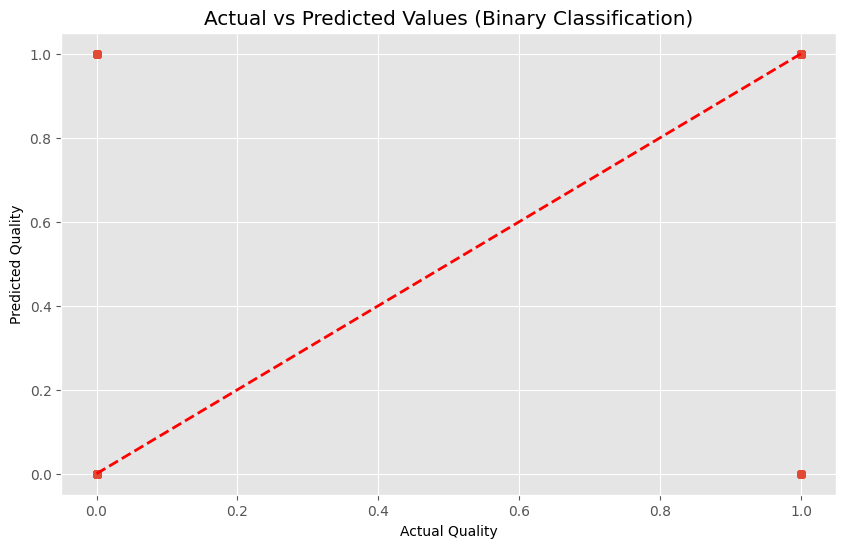

In [27]:
plt.figure(figsize=(10, 6))
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.scatterplot(data=actual_vs_predicted, x="Actual", y="Predicted", alpha=0.6, edgecolor=None)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Values (Binary Classification)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()

# Naive bayes

Accuracy: 71.25%
Balanced Accuracy: 71.24%
Sensitivity (Recall): 0.71
Specificity: 0.71
Precision: 0.75
F-Measure: 0.73
Matthews Correlation Coefficient (MCC): 0.4233289620276867

Classification Report:
               precision    recall  f1-score   support

 Low Quality       0.67      0.71      0.69       218
High Quality       0.75      0.71      0.73       262

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



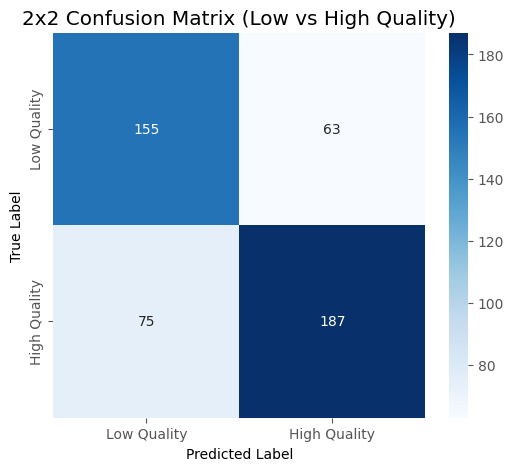

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, classification_report
)

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Define the threshold for binary classification
threshold = 6

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)  # Features
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low quality, 1 = high quality

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # Removed random_state for variability

# Initialize and fit the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Calculate confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = (tp + tn) / (tp + tn + fp + fn) * 100  # Convert accuracy to percentage

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Balanced Accuracy: (TPR + TNR) / 2
balanced_acc = (sensitivity + specificity) * 100 / 2  # Convert balanced accuracy to percentage

# Precision: TP / (TP + FP)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
f_measure = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

# Matthews Correlation Coefficient (MCC)
mcc = (tp * tn - fp * fn) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) > 0 else 0  # Avoid division by zero

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F-Measure: {f_measure:.2f}")
print("Matthews Correlation Coefficient (MCC):", mcc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Ada Boost

Accuracy: 72.08%
Sensitivity (Recall): 0.80%
Specificity: 0.65%
Precision: 0.67%
F-Measure: 0.73%
Balanced Accuracy: 72.50%
Matthews Correlation Coefficient (MCC): 0.4531186626721646

Classification Report:
               precision    recall  f1-score   support

 Low Quality       0.78      0.65      0.71       253
High Quality       0.67      0.80      0.73       227

    accuracy                           0.72       480
   macro avg       0.73      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480



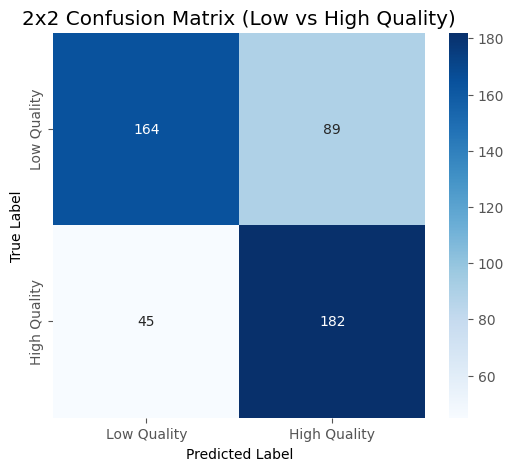

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Define the threshold for binary classification
threshold = 6

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)  # Features
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low quality, 1 = high quality

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize and fit the AdaBoost model
ada = AdaBoostClassifier()  # Removed random_state for variability
ada.fit(X_train, y_train)

# Predict on the test set
y_pred = ada.predict(X_test)

# Calculate confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = (tp + tn) / (tp + tn + fp + fn) * 100  # Convert accuracy to percentage

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Precision: TP / (TP + FP)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value

# Recall (Sensitivity already calculated above, but included for clarity)
recall = sensitivity

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Balanced Accuracy: (TPR + TNR) / 2
balanced_acc = (sensitivity + specificity) * 100 / 2  # Convert balanced accuracy to percentage

# Matthews Correlation Coefficient (MCC)
mcc_numerator = (tp * tn) - (fp * fn)
mcc_denominator = (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) > 0 else 1
mcc = mcc_numerator / mcc_denominator  # Avoid division by zero by using 1 as denominator fallback

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F-Measure: {f_measure:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print("Matthews Correlation Coefficient (MCC):", mcc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# CAT Boost

In [30]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


Accuracy: 77.71%
Sensitivity (Recall): 0.81%
Specificity: 0.74%
Precision: 0.76%
F-Measure: 0.78%
Balanced Accuracy: 77.69%
Matthews Correlation Coefficient (MCC): 0.5551286900686146

Classification Report:
               precision    recall  f1-score   support

 Low Quality       0.79      0.74      0.77       239
High Quality       0.76      0.81      0.78       241

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



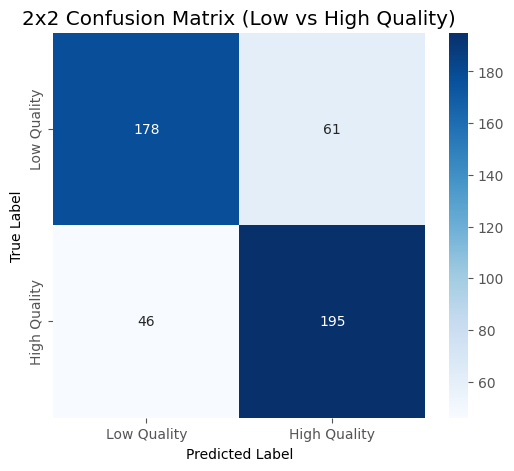

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Define the threshold for binary classification
threshold = 6

# Define features and binary target (quality as low vs. high based on threshold)
X = df.drop('quality', axis=1)  # Features
y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low quality, 1 = high quality

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize and fit the CatBoost model (removed random_seed for variability)
catboost = CatBoostClassifier(verbose=0)  # Removed random_seed
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

# Calculate confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = (tp + tn) / (tp + tn + fp + fn) * 100  # Convert accuracy to percentage

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Precision: TP / (TP + FP)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value

# Recall (Sensitivity already calculated above, but included for clarity)
recall = sensitivity

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Balanced Accuracy: (TPR + TNR) / 2
balanced_acc = (sensitivity + specificity) * 100 / 2  # Convert balanced accuracy to percentage

# Matthews Correlation Coefficient (MCC)
mcc_numerator = (tp * tn) - (fp * fn)
mcc_denominator = (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) > 0 else 1
mcc = mcc_numerator / mcc_denominator  # Avoid division by zero by using 1 as denominator fallback

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F-Measure: {f_measure:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print("Matthews Correlation Coefficient (MCC):", mcc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# XG Boost

In [32]:
# pip install xgboost

Accuracy: 90.62%
Sensitivity (Recall): 0.68%
Specificity: 0.94%
Precision: 0.65%
F-Measure: 0.66%
Balanced Accuracy: 80.95%
Matthews Correlation Coefficient (MCC): 0.6075

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       415
           1       0.65      0.68      0.66        65

    accuracy                           0.91       480
   macro avg       0.80      0.81      0.80       480
weighted avg       0.91      0.91      0.91       480



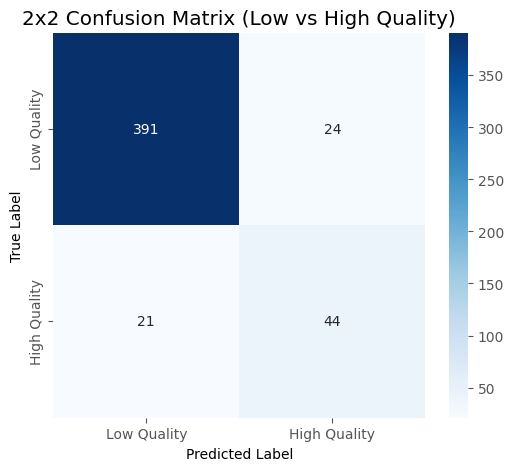

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load your DataFrame 'df' here
# For example, you can load it from a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Step 1: Define features and target
X = df.drop('quality', axis=1)

# Step 2: Re-categorize quality into Low (0) and High (1)
y = df['quality'].apply(lambda x: 1 if x > df['quality'].median() else 0)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # Removed random_state for variability

# Step 4: Initialize and fit the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Removed random_state for variability
xgb.fit(X_train, y_train)

# Step 5: Predict and calculate metrics
y_pred = xgb.predict(X_test)

# Step 6: Calculate performance metrics

# Confusion matrix values
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Accuracy: (TP + TN) / (TP + TN + FP + FN) * 100
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100 if (tp + tn + fp + fn) > 0 else 0  # Convert accuracy to percentage

# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate

# Precision: TP / (TP + FP)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value

# Recall (Sensitivity already calculated above, but included for clarity)
recall = sensitivity

# F-Measure: 2 * (Precision * Recall) / (Precision + Recall)
f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Calculate Balanced Accuracy manually
balanced_acc = (sensitivity + specificity) * 100 / 2  # Convert balanced accuracy to percentage

# Matthews Correlation Coefficient (MCC)
mcc_numerator = (tp * tn) - (fp * fn)
mcc_denominator = (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5) if ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) > 0 else 1
mcc = mcc_numerator / mcc_denominator  # Avoid division by zero by using 1 as denominator fallback

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F-Measure: {f_measure:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: 2x2 Confusion Matrix visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.title("2x2 Confusion Matrix (Low vs High Quality)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [54]:
import joblib

# Save the trained model
joblib.dump(xgb, 'xgb_model.joblib')
print("Model saved as 'xgb_model.joblib'.")

# Load the model
loaded_model = joblib.load('xgb_model.joblib')
print("Model loaded from 'xgb_model.joblib'.")

# Prediction function using the loaded model
def predict_sample_with_loaded_model(sample_data, model):
    """
    Predict the quality category (Low or High) for a given sample using a loaded model.

    Parameters:
    sample_data (list or array): A list or array of feature values in the same order as the columns in the DataFrame X.
    model (XGBClassifier): The loaded XGBoost model.

    Returns:
    str: Predicted category ("Low Quality" or "High Quality").
    """
    sample_df = pd.DataFrame([sample_data], columns=X.columns)  # Ensure correct feature columns
    prediction = model.predict(sample_df)
    return "High Quality" if prediction[0] == 1 else "Low Quality"

# Example usage with sample data (adjust feature values to match X columns)
sample_data = [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5]
print("Predicted Quality:", predict_sample_with_loaded_model(sample_data, loaded_model))


Model saved as 'xgb_model.joblib'.
Model loaded from 'xgb_model.joblib'.
Predicted Quality: Low Quality


In [55]:
# Example low-quality sample (adjust feature values to reflect expected low quality)
low_quality_sample = [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]

# Example high-quality sample (adjust feature values to reflect expected high quality)
high_quality_sample = [8.5, 0.28, 0.56, 1.8, 0.092, 35.0, 103.0, 0.9969, 3.3, 0.75, 10.5]

# Predict using the loaded model for low and high quality
print("Predicted Quality for low-quality sample:", predict_sample_with_loaded_model(low_quality_sample, loaded_model))
print("Predicted Quality for high-quality sample:", predict_sample_with_loaded_model(high_quality_sample, loaded_model))


Predicted Quality for low-quality sample: Low Quality
Predicted Quality for high-quality sample: High Quality


0
Predicted Quality: Low Quality
0
Predicted Quality: Low Quality


Predicted Quality: Low Quality


# MLP

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset, ensuring the file path and column names are correct
df = pd.read_csv('winequality-red.csv')  # Replace 'your_data_file.csv' with the actual file path

# Check if 'quality' column exists, and if not, look for potential alternatives
if 'quality' not in df.columns:
    # Print available columns to help identify the correct column name
    print("Available columns:", df.columns)
    # If the column name is different, update the code accordingly
    # For example, if the column is named 'wine_quality', change 'quality' to 'wine_quality' in the code below
    # quality_column = 'wine_quality'  # Replace with the actual column name
    # X = df.drop(quality_column, axis=1)
    # y = df[quality_column].apply(lambda x: 0 if x < threshold else 1)
else:
    # Define the threshold for quality classification
    threshold = 6

    # Define features and binary target (quality as low vs. high based on threshold)
    X = df.drop('quality', axis=1)
    # The following line had an extra indent. Removed the indent to align with 'X = ...' above
    y = df['quality'].apply(lambda x: 0 if x < threshold else 1)  # 0 = low, 1 = high quality

# Continue with the rest of the code as before...
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # Removed random_state

# Initialize and fit the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)  # Removed random_state
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Manually calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) * 100  # Convert to percentage

# Manually calculate Balanced Accuracy
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate
balanced_acc = (TPR + TNR) / 2 * 100  # Convert to percentage

# Matthews Correlation Coefficient (MCC)
mcc_numerator = (TP * TN) - (FP * FN)
mcc_denominator = (((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5) if ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) > 0 else 1
mcc = mcc_numerator / mcc_denominator  # Avoid division by zero by using 1 as denominator fallback

# Calculate additional metrics
# Sensitivity (Recall)
sensitivity = TPR  # Already calculated

# Specificity
specificity = TNR  # Already calculated

# Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Positive Predictive Value

# F-Measure
f_measure = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

# Display metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F-Measure: {f_measure:.2f}%")
print(f"Balanced Accuracy: {balanced_acc:.2f}%")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Plot 2x2 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap

Accuracy: 71.88%
Sensitivity (Recall): 0.80%
Specificity: 0.63%
Precision: 0.70%
F-Measure: 0.74%
Balanced Accuracy: 71.66%
Matthews Correlation Coefficient (MCC): 0.4403

Classification Report:
               precision    recall  f1-score   support

 Low Quality       0.75      0.63      0.69       234
High Quality       0.70      0.80      0.74       246

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

<Figure size 600x500 with 0 Axes>